In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes=pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
# Zero values should need to be put NaN value and drop two columns Pregnancies and 

X=diabetes.drop(['Pregnancies','Outcome'], axis=1)

In [13]:
X.replace(0, np.nan, inplace=True)

In [14]:
X.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Age                           0
DiabetesPedigreeFunction      0
dtype: int64

* Simple Imputer
* Imputer is used to replace zero values with mean, median, and mode strategy 

In [16]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')

In [19]:
diabetes_df_array=impute.fit_transform(X)

In [20]:
diabetes_df_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [21]:
diabetes_df=pd.DataFrame(diabetes_df_array, columns=X.columns)

In [23]:
diabetes_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [24]:
diabetes_df['Pregnancies']=diabetes.Pregnancies
diabetes_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [25]:
Y=diabetes['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

* Train and Test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(diabetes_df, Y, test_size=0.15, random_state=2)

* Logistic Neural Network

In [35]:
from keras.layers import Dense
from keras import Sequential
from keras.optimizers import adam
import tensorflow as tf

In [36]:
def build_model():
    model=Sequential([
        # Input Layer
        Dense(units=128, activation='relu', input_shape=[len(diabetes_df.keys())]),
        # Hidden Layers - I
        Dense(units=256, activation='relu'), 
        # Hidden Layers - II
        Dense(units=256, activation='relu'),
        # 1 - Sigmoid, loss = binary_crossentropy
        # 2 - Softmax, loss = categorical_crossentropy
        Dense(1, activation=tf.nn.sigmoid)
    ])
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [37]:
model = build_model()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 100,225
Trainable params: 100,225
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train, Y_train, epochs=1000, validation_split= 0.15) 


Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 98 samples
Epoch 1/1000
554/554 [==============================] - 0s 458us/step - loss: 2.0947 - accuracy: 0.5505 - val_loss: 0.7341 - val_accuracy: 0.7041
Epoch 2/1000
554/554 [==============================] - 0s 74us/step - loss: 1.0723 - accuracy: 0.6173 - val_loss: 0.7292 - val_accuracy: 0.6224
Epoch 3/1000
554/554 [==============================] - 0s 69us/step - loss: 0.6855 - accuracy: 0.6498 - val_loss: 0.7239 - val_accuracy: 0.6633
Epoch 4/1000
554/554 [==============================] - 0s 69us/step - loss: 0.5912 - accuracy: 0.6949 - val_loss: 0.6186 - val_accuracy: 0.6531
Epoch 5/1000
554/554 [==============================] - 0s 69us/step - loss: 0.6094 - accuracy: 0.6823 - val_loss: 0.8234 - val_accuracy: 0.5408
Epoch 6/1000
554/554 [==============================] - 0s 67us/step - loss: 0.6866 - accuracy: 0.6534 - val_loss: 0.6108 - val_accuracy: 0.6735
Epoch 7/1000
554/554 [==============

554/554 [==============================] - 0s 60us/step - loss: 0.4503 - accuracy: 0.7798 - val_loss: 0.6775 - val_accuracy: 0.7449
Epoch 56/1000
554/554 [==============================] - 0s 56us/step - loss: 0.4529 - accuracy: 0.7780 - val_loss: 0.7161 - val_accuracy: 0.7245
Epoch 57/1000
554/554 [==============================] - 0s 70us/step - loss: 0.4633 - accuracy: 0.7617 - val_loss: 0.7182 - val_accuracy: 0.7857
Epoch 58/1000
554/554 [==============================] - 0s 56us/step - loss: 0.4923 - accuracy: 0.7563 - val_loss: 0.7896 - val_accuracy: 0.6735
Epoch 59/1000
554/554 [==============================] - 0s 56us/step - loss: 0.4775 - accuracy: 0.7708 - val_loss: 0.7689 - val_accuracy: 0.7449
Epoch 60/1000
554/554 [==============================] - 0s 58us/step - loss: 0.4558 - accuracy: 0.7726 - val_loss: 0.6856 - val_accuracy: 0.7143
Epoch 61/1000
554/554 [==============================] - 0s 56us/step - loss: 0.4450 - accuracy: 0.7834 - val_loss: 0.6700 - val_accuracy:

554/554 [==============================] - 0s 63us/step - loss: 0.3442 - accuracy: 0.8375 - val_loss: 0.8163 - val_accuracy: 0.7245
Epoch 112/1000
554/554 [==============================] - 0s 58us/step - loss: 0.3480 - accuracy: 0.8375 - val_loss: 0.8569 - val_accuracy: 0.7449
Epoch 113/1000
554/554 [==============================] - 0s 54us/step - loss: 0.3524 - accuracy: 0.8321 - val_loss: 0.7556 - val_accuracy: 0.7449
Epoch 114/1000
554/554 [==============================] - 0s 54us/step - loss: 0.3509 - accuracy: 0.8448 - val_loss: 0.8482 - val_accuracy: 0.6837
Epoch 115/1000
554/554 [==============================] - 0s 58us/step - loss: 0.3558 - accuracy: 0.8195 - val_loss: 0.7926 - val_accuracy: 0.7143
Epoch 116/1000
554/554 [==============================] - 0s 56us/step - loss: 0.3371 - accuracy: 0.8520 - val_loss: 0.7254 - val_accuracy: 0.7143
Epoch 117/1000
554/554 [==============================] - 0s 58us/step - loss: 0.3330 - accuracy: 0.8303 - val_loss: 0.7692 - val_acc

Epoch 167/1000
554/554 [==============================] - 0s 58us/step - loss: 0.2326 - accuracy: 0.9007 - val_loss: 0.8605 - val_accuracy: 0.7347
Epoch 168/1000
554/554 [==============================] - 0s 56us/step - loss: 0.2296 - accuracy: 0.8971 - val_loss: 0.9448 - val_accuracy: 0.7143
Epoch 169/1000
554/554 [==============================] - 0s 54us/step - loss: 0.2306 - accuracy: 0.9025 - val_loss: 1.0640 - val_accuracy: 0.6837
Epoch 170/1000
554/554 [==============================] - 0s 56us/step - loss: 0.2166 - accuracy: 0.9043 - val_loss: 0.9963 - val_accuracy: 0.7245
Epoch 171/1000
554/554 [==============================] - 0s 56us/step - loss: 0.2239 - accuracy: 0.9224 - val_loss: 0.8711 - val_accuracy: 0.7347
Epoch 172/1000
554/554 [==============================] - 0s 58us/step - loss: 0.2052 - accuracy: 0.9206 - val_loss: 0.8723 - val_accuracy: 0.7347
Epoch 173/1000
554/554 [==============================] - 0s 56us/step - loss: 0.2159 - accuracy: 0.9097 - val_loss: 1

Epoch 223/1000
554/554 [==============================] - 0s 56us/step - loss: 0.1226 - accuracy: 0.9567 - val_loss: 1.3061 - val_accuracy: 0.6735
Epoch 224/1000
554/554 [==============================] - 0s 56us/step - loss: 0.1106 - accuracy: 0.9567 - val_loss: 1.3665 - val_accuracy: 0.6837
Epoch 225/1000
554/554 [==============================] - 0s 58us/step - loss: 0.1639 - accuracy: 0.9134 - val_loss: 1.3165 - val_accuracy: 0.6837
Epoch 226/1000
554/554 [==============================] - 0s 54us/step - loss: 0.1718 - accuracy: 0.9368 - val_loss: 1.3528 - val_accuracy: 0.6837
Epoch 227/1000
554/554 [==============================] - 0s 56us/step - loss: 0.1461 - accuracy: 0.9477 - val_loss: 1.2154 - val_accuracy: 0.7041
Epoch 228/1000
554/554 [==============================] - 0s 56us/step - loss: 0.1101 - accuracy: 0.9621 - val_loss: 1.0853 - val_accuracy: 0.6633
Epoch 229/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0970 - accuracy: 0.9693 - val_loss: 1

Epoch 279/1000
554/554 [==============================] - 0s 56us/step - loss: 0.1080 - accuracy: 0.9567 - val_loss: 1.9115 - val_accuracy: 0.6429
Epoch 280/1000
554/554 [==============================] - 0s 56us/step - loss: 0.1989 - accuracy: 0.9206 - val_loss: 1.2053 - val_accuracy: 0.6939
Epoch 281/1000
554/554 [==============================] - 0s 60us/step - loss: 0.2439 - accuracy: 0.9170 - val_loss: 1.1797 - val_accuracy: 0.6837
Epoch 282/1000
554/554 [==============================] - 0s 60us/step - loss: 0.2937 - accuracy: 0.8953 - val_loss: 1.5247 - val_accuracy: 0.6429
Epoch 283/1000
554/554 [==============================] - 0s 63us/step - loss: 0.2019 - accuracy: 0.9260 - val_loss: 1.3058 - val_accuracy: 0.6939
Epoch 284/1000
554/554 [==============================] - 0s 63us/step - loss: 0.1326 - accuracy: 0.9567 - val_loss: 1.2445 - val_accuracy: 0.6939
Epoch 285/1000
554/554 [==============================] - 0s 60us/step - loss: 0.0974 - accuracy: 0.9693 - val_loss: 1

Epoch 335/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0141 - accuracy: 0.9982 - val_loss: 1.5724 - val_accuracy: 0.6939
Epoch 336/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0175 - accuracy: 0.9964 - val_loss: 1.5684 - val_accuracy: 0.7041
Epoch 337/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0356 - accuracy: 0.9910 - val_loss: 1.5331 - val_accuracy: 0.7041
Epoch 338/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 1.5478 - val_accuracy: 0.6939
Epoch 339/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.6405 - val_accuracy: 0.6633
Epoch 340/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 1.5317 - val_accuracy: 0.7143
Epoch 341/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1

Epoch 391/1000
554/554 [==============================] - 0s 63us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.7607 - val_accuracy: 0.6633
Epoch 392/1000
554/554 [==============================] - 0s 61us/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7551 - val_accuracy: 0.6531
Epoch 393/1000
554/554 [==============================] - 0s 61us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.7792 - val_accuracy: 0.6735
Epoch 394/1000
554/554 [==============================] - 0s 63us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.7636 - val_accuracy: 0.6735
Epoch 395/1000
554/554 [==============================] - 0s 60us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.7897 - val_accuracy: 0.6735
Epoch 396/1000
554/554 [==============================] - 0s 61us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.7734 - val_accuracy: 0.6735
Epoch 397/1000
554/554 [==============================] - 0s 63us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1

Epoch 447/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.5243 - val_accuracy: 0.7143
Epoch 448/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.5924 - val_accuracy: 0.7041
Epoch 449/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5739 - val_accuracy: 0.7245
Epoch 450/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6097 - val_accuracy: 0.7245
Epoch 451/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.6337 - val_accuracy: 0.7041
Epoch 452/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 1.6160 - val_accuracy: 0.7143
Epoch 453/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1

Epoch 503/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.4320 - val_accuracy: 0.7041
Epoch 504/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0116 - accuracy: 0.9982 - val_loss: 1.5552 - val_accuracy: 0.6837
Epoch 505/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5009 - val_accuracy: 0.6837
Epoch 506/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.4996 - val_accuracy: 0.6939
Epoch 507/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.5331 - val_accuracy: 0.7041
Epoch 508/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.5506 - val_accuracy: 0.7041
Epoch 509/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1

Epoch 559/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0728 - accuracy: 0.9783 - val_loss: 1.8706 - val_accuracy: 0.6531
Epoch 560/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0617 - accuracy: 0.9838 - val_loss: 1.5741 - val_accuracy: 0.6735
Epoch 561/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 1.7319 - val_accuracy: 0.7041
Epoch 562/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0337 - accuracy: 0.9874 - val_loss: 1.8411 - val_accuracy: 0.6633
Epoch 563/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 1.9771 - val_accuracy: 0.6735
Epoch 564/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 1.6661 - val_accuracy: 0.7041
Epoch 565/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 1

Epoch 615/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0342 - accuracy: 0.9982 - val_loss: 1.7018 - val_accuracy: 0.6939
Epoch 616/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0339 - accuracy: 0.9982 - val_loss: 1.7358 - val_accuracy: 0.6735
Epoch 617/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0335 - accuracy: 0.9982 - val_loss: 1.7554 - val_accuracy: 0.6837
Epoch 618/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0333 - accuracy: 0.9982 - val_loss: 1.7588 - val_accuracy: 0.6735
Epoch 619/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0331 - accuracy: 0.9982 - val_loss: 1.7878 - val_accuracy: 0.6939
Epoch 620/1000
554/554 [==============================] - 0s 60us/step - loss: 0.0329 - accuracy: 0.9982 - val_loss: 1.8018 - val_accuracy: 0.6735
Epoch 621/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0325 - accuracy: 0.9982 - val_loss: 1

Epoch 671/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0296 - accuracy: 0.9982 - val_loss: 2.1351 - val_accuracy: 0.6735
Epoch 672/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0296 - accuracy: 0.9982 - val_loss: 2.1363 - val_accuracy: 0.6735
Epoch 673/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0296 - accuracy: 0.9982 - val_loss: 2.1377 - val_accuracy: 0.6735
Epoch 674/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0296 - accuracy: 0.9982 - val_loss: 2.1464 - val_accuracy: 0.6735
Epoch 675/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0296 - accuracy: 0.9982 - val_loss: 2.1473 - val_accuracy: 0.6735
Epoch 676/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0296 - accuracy: 0.9982 - val_loss: 2.1510 - val_accuracy: 0.6633
Epoch 677/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0295 - accuracy: 0.9982 - val_loss: 2

Epoch 727/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2.3098 - val_accuracy: 0.6633
Epoch 728/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2.3179 - val_accuracy: 0.6633
Epoch 729/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2.3144 - val_accuracy: 0.6633
Epoch 730/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2.3101 - val_accuracy: 0.6633
Epoch 731/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2.3257 - val_accuracy: 0.6633
Epoch 732/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2.3279 - val_accuracy: 0.6633
Epoch 733/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 2

Epoch 783/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0850 - accuracy: 0.9783 - val_loss: 1.0486 - val_accuracy: 0.6939
Epoch 784/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0785 - accuracy: 0.9838 - val_loss: 1.1600 - val_accuracy: 0.6939
Epoch 785/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0623 - accuracy: 0.9910 - val_loss: 1.2296 - val_accuracy: 0.6939
Epoch 786/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0518 - accuracy: 0.9910 - val_loss: 1.2427 - val_accuracy: 0.6939
Epoch 787/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0490 - accuracy: 0.9946 - val_loss: 1.2449 - val_accuracy: 0.6939
Epoch 788/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0628 - accuracy: 0.9892 - val_loss: 1.2997 - val_accuracy: 0.6531
Epoch 789/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0525 - accuracy: 0.9928 - val_loss: 1

Epoch 839/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7963 - val_accuracy: 0.6837
Epoch 840/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.7594 - val_accuracy: 0.6633
Epoch 841/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 1.7889 - val_accuracy: 0.6837
Epoch 842/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.7271 - val_accuracy: 0.6633
Epoch 843/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.7986 - val_accuracy: 0.6633
Epoch 844/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.7690 - val_accuracy: 0.6633
Epoch 845/1000
554/554 [==============================] - 0s 69us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1

Epoch 895/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0405 - accuracy: 0.9982 - val_loss: 1.4630 - val_accuracy: 0.6939
Epoch 896/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0356 - accuracy: 0.9946 - val_loss: 1.4013 - val_accuracy: 0.7143
Epoch 897/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0273 - accuracy: 0.9982 - val_loss: 1.4312 - val_accuracy: 0.7143
Epoch 898/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0254 - accuracy: 0.9982 - val_loss: 1.4617 - val_accuracy: 0.7245
Epoch 899/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 1.4282 - val_accuracy: 0.7143
Epoch 900/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0317 - accuracy: 0.9928 - val_loss: 1.4876 - val_accuracy: 0.7041
Epoch 901/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0384 - accuracy: 0.9946 - val_loss: 1

Epoch 951/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.7582 - val_accuracy: 0.7347
Epoch 952/1000
554/554 [==============================] - 0s 56us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.7439 - val_accuracy: 0.7347
Epoch 953/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7581 - val_accuracy: 0.7347
Epoch 954/1000
554/554 [==============================] - 0s 63us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.7611 - val_accuracy: 0.7347
Epoch 955/1000
554/554 [==============================] - 0s 54us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7824 - val_accuracy: 0.7347
Epoch 956/1000
554/554 [==============================] - 0s 61us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.7448 - val_accuracy: 0.7347
Epoch 957/1000
554/554 [==============================] - 0s 58us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1

In [39]:
predictions = model.predict(X_test)
yhat = np.round(predictions)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, yhat)

array([[69, 12],
       [17, 18]], dtype=int64)

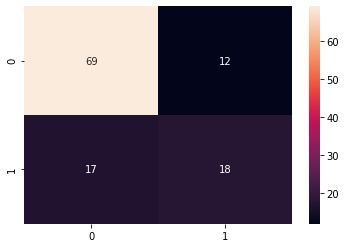

In [43]:
sns.heatmap(confusion_matrix(Y_test, yhat), annot=True)

In [ ]:
new_data=[120.0,72.0,35.0,125.0,0.33]